**M21 -Criar funções que criem conexões**

 Calcule a média por nome e sobrenome do ator da seguintes variáveis:
- rental_duration
- rental_rate
- length
- replacement_cost

### Calcule a soma de amount (preço total do aluguel) por nome, sobrenome e email do cliente (customer) e indique os 10 clientes que mais gastaram e os 10 que menos gastaram.


In [1]:
# Instalação do PostgreSQL
!sudo apt-get update -y
!sudo apt-get install postgresql postgresql-contrib -y

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cli.github.com/packages stable InRelease [3,917 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [5,988 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packag

In [2]:
# Início do serviço
!sudo service postgresql start
!sudo -u postgres psql -c "ALTER USER postgres PASSWORD 'senha123';"


 * Starting PostgreSQL 14 database server
   ...done.
ALTER ROLE


In [4]:
# Restauração do banco
# Restaurar dvdrental.tar
!sudo -u postgres dropdb dvdrental --if-exists
!sudo -u postgres createdb dvdrental
!sudo -u postgres pg_restore -d dvdrental "/content/dvdrental.tar"

In [5]:
# Restaurar demo-medium-en-20170815.sql
!sudo -u postgres dropdb demo --if-exists
!sudo -u postgres createdb demo
!sudo -u postgres psql -d demo -f "/content/demo-medium-en-20170815.sql"

NOTICE:  database "demo" does not exist, skipping
SET
SET
SET
SET
SET
SET
SET
SET
psql:/content/demo-medium-en-20170815.sql:17: ERROR:  cannot drop the currently open database
psql:/content/demo-medium-en-20170815.sql:22: ERROR:  database "demo" already exists
You are now connected to database "demo" as user "postgres".
SET
SET
SET
SET
SET
SET
SET
SET
CREATE SCHEMA
COMMENT
CREATE EXTENSION
COMMENT
SET
CREATE FUNCTION
CREATE FUNCTION
COMMENT
SET
SET
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
CREATE VIEW
COMMENT
COMMENT
COMMENT
COMMENT
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
CREATE VIEW
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
CREATE SEQUENCE
ALTER SEQUENCE
CREATE VIEW
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT

In [6]:
# Restaurar dvdrental.tar
!sudo -u postgres dropdb dvdrental --if-exists
!sudo -u postgres createdb dvdrental
!sudo -u postgres pg_restore -d dvdrental "/content/dvdrental.tar"

# Restaurar demo-medium-en-20170815.sql
!sudo -u postgres dropdb demo --if-exists
!sudo -u postgres createdb demo
!sudo -u postgres psql -d demo -f "/content/demo-medium-en-20170815.sql"

SET
SET
SET
SET
SET
SET
SET
SET
psql:/content/demo-medium-en-20170815.sql:17: ERROR:  cannot drop the currently open database
psql:/content/demo-medium-en-20170815.sql:22: ERROR:  database "demo" already exists
You are now connected to database "demo" as user "postgres".
SET
SET
SET
SET
SET
SET
SET
SET
CREATE SCHEMA
COMMENT
CREATE EXTENSION
COMMENT
SET
CREATE FUNCTION
CREATE FUNCTION
COMMENT
SET
SET
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
CREATE VIEW
COMMENT
COMMENT
COMMENT
COMMENT
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
CREATE VIEW
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
CREATE TABLE
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
CREATE SEQUENCE
ALTER SEQUENCE
CREATE VIEW
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
COMMENT
C

In [7]:
!timeout 10 sudo -u postgres psql -d dvdrental -c "\\dt"

             List of relations
 Schema |     Name      | Type  |  Owner   
--------+---------------+-------+----------
 public | actor         | table | postgres
 public | address       | table | postgres
 public | category      | table | postgres
 public | city          | table | postgres
 public | country       | table | postgres
 public | customer      | table | postgres
 public | film          | table | postgres
 public | film_actor    | table | postgres
 public | film_category | table | postgres
 public | inventory     | table | postgres
 public | language      | table | postgres
 public | payment       | table | postgres
 public | rental        | table | postgres
 public | staff         | table | postgres
 public | store         | table | postgres
(15 rows)

>8

In [8]:
!pip install psycopg2-binary pandas seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.4 MB/s eta 0:00:00


In [9]:
import psycopg2 as pg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [10]:
def connect_to_postgres(db):
    return pg2.connect(host="localhost",port=5432,dbname=db,user="postgres",password="senha123")

In [11]:
def execute_query(db,query):
    conn=connect_to_postgres(db)
    cur=conn.cursor()
    cur.execute(query)
    data=cur.fetchall()
    cols=[d[0] for d in cur.description]
    cur.close(); conn.close()
    return pd.DataFrame(data, columns=cols)

Query de Médias por Ator

In [15]:
sql_medias = '''
SELECT a.first_name, a.last_name,
AVG(f.rental_duration) AS avg_rental_duration,
AVG(f.rental_rate) AS avg_rental_rate,
AVG(f.length) AS avg_length,
AVG(f.replacement_cost) AS avg_replacement_cost
FROM actor a
JOIN film_actor fa ON fa.actor_id=a.actor_id
JOIN film f ON f.film_id=fa.film_id
GROUP BY a.first_name, a.last_name
ORDER BY a.first_name, a.last_name;
'''
df_medias = execute_query("dvdrental", sql_medias)
# Convert relevant columns to numeric types
df_medias['avg_rental_duration'] = df_medias['avg_rental_duration'].astype(float)
df_medias['avg_rental_rate'] = df_medias['avg_rental_rate'].astype(float)
df_medias['avg_length'] = df_medias['avg_length'].astype(float)
df_medias['avg_replacement_cost'] = df_medias['avg_replacement_cost'].astype(float)
df_medias

,first_name,last_name,avg_rental_duration,avg_rental_rate,avg_length,avg_replacement_cost
0,Adam,Grant,5.277778,2.767778,122.388889,22.934444
1,Adam,Hopper,4.863636,2.808182,112.272727,19.490000
2,Al,Garland,5.115385,2.759231,106.384615,19.874615
3,Alan,Dreyfuss,5.037037,2.841852,111.296296,19.360370
4,Albert,Johansson,5.060606,3.293030,126.636364,22.474848
...,...,...,...,...,...,...
194,Will,Wilson,5.064516,3.054516,115.967742,19.957742
195,William,Hackman,4.777778,3.138148,129.074074,20.064074
196,Woody,Hoffman,4.580645,2.990000,120.838710,19.699677
197,Woody,Jolie,4.354839,2.602903,114.935484,19.409355


In [17]:
df_medias.shape

(199, 6)

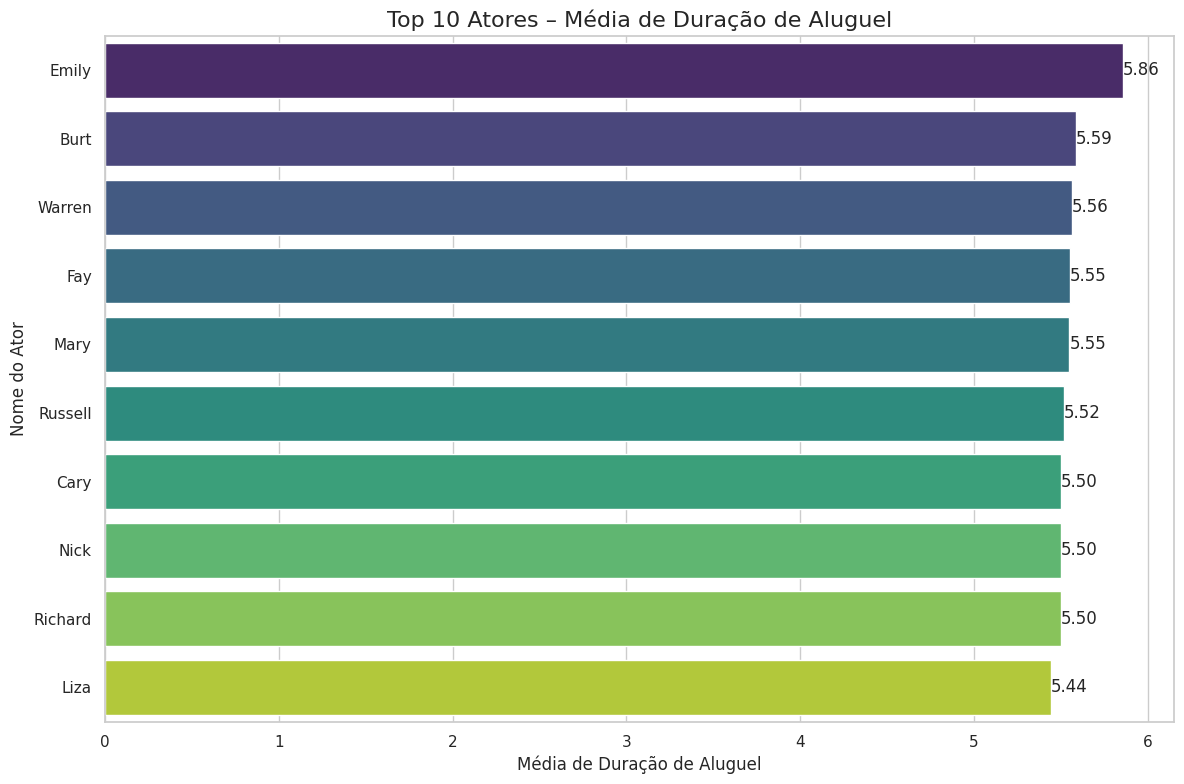

In [19]:
plt.figure(figsize=(12, 8))

df_top10 = df_medias.nlargest(10, "avg_rental_duration")

sns.barplot(
    data=df_top10,
    x="avg_rental_duration",
    y="first_name",
    hue="first_name", # Assign y-variable to hue to resolve FutureWarning
    palette='viridis',
    order=df_top10.sort_values('avg_rental_duration', ascending=False)['first_name'],
    legend=False # Set legend to False as suggested by FutureWarning
)

# Add values on the bars
for index, value in enumerate(df_top10.sort_values('avg_rental_duration', ascending=False)['avg_rental_duration']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title("Top 10 Atores – Média de Duração de Aluguel", fontsize=16)
plt.xlabel("Média de Duração de Aluguel", fontsize=12)
plt.ylabel("Nome do Ator", fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

gráfico das médias

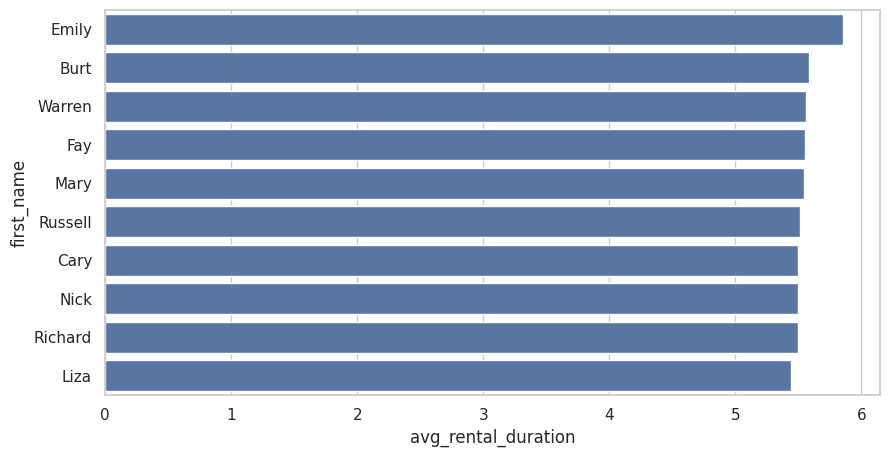

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_medias.nlargest(10,"avg_rental_duration"),
            x="avg_rental_duration",y="first_name")
plt.show()

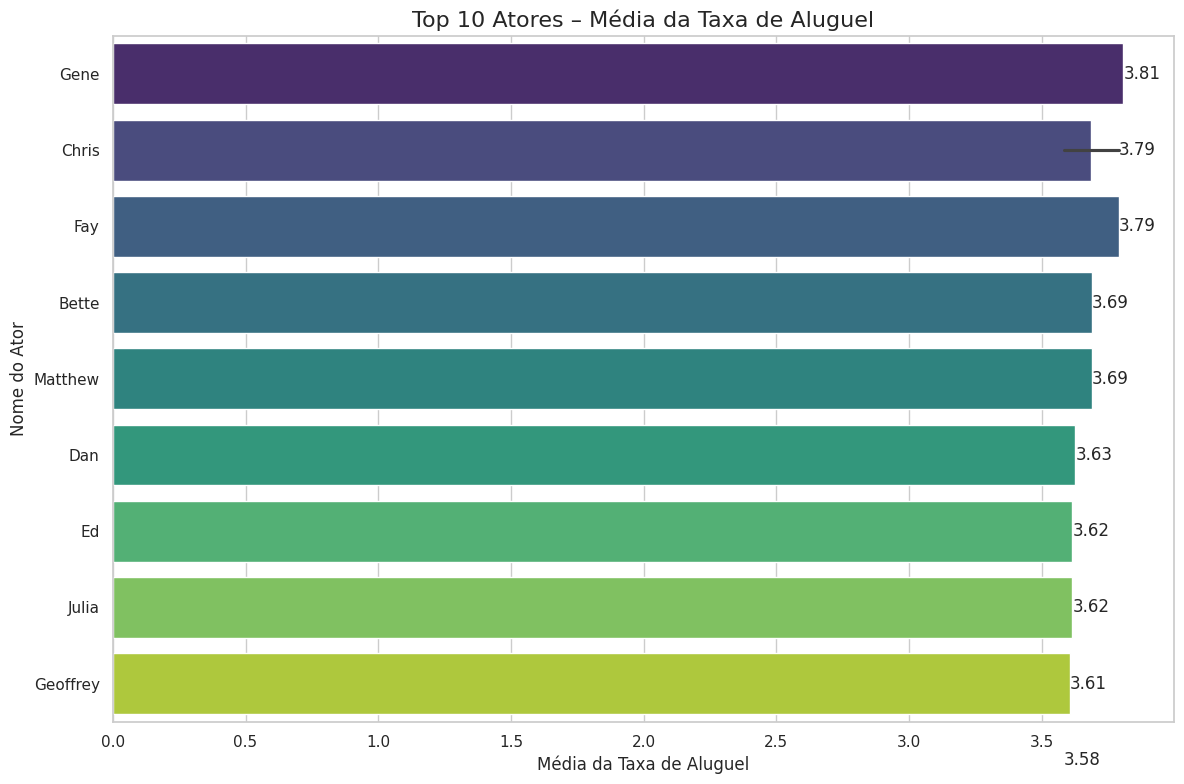

In [24]:
plt.figure(figsize=(12, 8))

df_top10_rate = df_medias.nlargest(10, "avg_rental_rate")

sns.barplot(
    data=df_top10_rate,
    x="avg_rental_rate",
    y="first_name",
    hue="first_name",
    palette='viridis',
    order=df_top10_rate.sort_values('avg_rental_rate', ascending=False)['first_name'],
    legend=False
)

# Add values on the bars
for index, value in enumerate(df_top10_rate.sort_values('avg_rental_rate', ascending=False)['avg_rental_rate']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title("Top 10 Atores – Média da Taxa de Aluguel", fontsize=16)
plt.xlabel("Média da Taxa de Aluguel", fontsize=12)
plt.ylabel("Nome do Ator", fontsize=12)
plt.tight_layout()
plt.show()

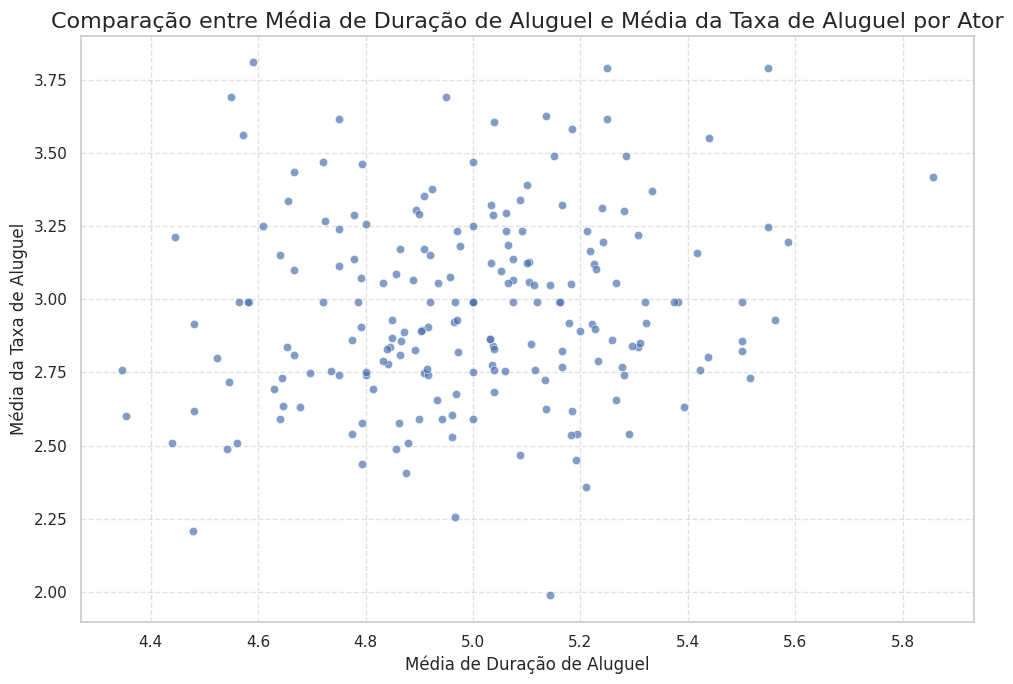

In [27]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_medias,
    x="avg_rental_duration",
    y="avg_rental_rate",
    # Removed 'hue' and 'size' to avoid an overly large and unreadable legend,
    # and to prevent tight_layout warnings caused by too many legend entries.
    # If specific actors need to be highlighted, we can consider other methods.
    alpha=0.7
)

plt.title("Comparação entre Média de Duração de Aluguel e Média da Taxa de Aluguel por Ator", fontsize=16)
plt.xlabel("Média de Duração de Aluguel", fontsize=12)
plt.ylabel("Média da Taxa de Aluguel", fontsize=12)
# Removed plt.legend() as hue was removed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Top 10 clientes

In [23]:
sql_top10 = '''
SELECT c.first_name, c.last_name, c.email,
SUM(p.amount) AS total_amount
FROM customer c
JOIN payment p ON p.customer_id=c.customer_id
GROUP BY c.first_name, c.last_name, c.email
ORDER BY total_amount DESC
LIMIT 10;
'''
top10 = execute_query("dvdrental", sql_top10)
top10

,first_name,last_name,email,total_amount
0,Eleanor,Hunt,eleanor.hunt@sakilacustomer.org,211.55
1,Karl,Seal,karl.seal@sakilacustomer.org,208.58
2,Marion,Snyder,marion.snyder@sakilacustomer.org,194.61
3,Rhonda,Kennedy,rhonda.kennedy@sakilacustomer.org,191.62
4,Clara,Shaw,clara.shaw@sakilacustomer.org,189.60
5,Tommy,Collazo,tommy.collazo@sakilacustomer.org,183.63
6,Ana,Bradley,ana.bradley@sakilacustomer.org,167.67
7,Curtis,Irby,curtis.irby@sakilacustomer.org,167.62
8,Marcia,Dean,marcia.dean@sakilacustomer.org,166.61
9,Mike,Way,mike.way@sakilacustomer.org,162.67


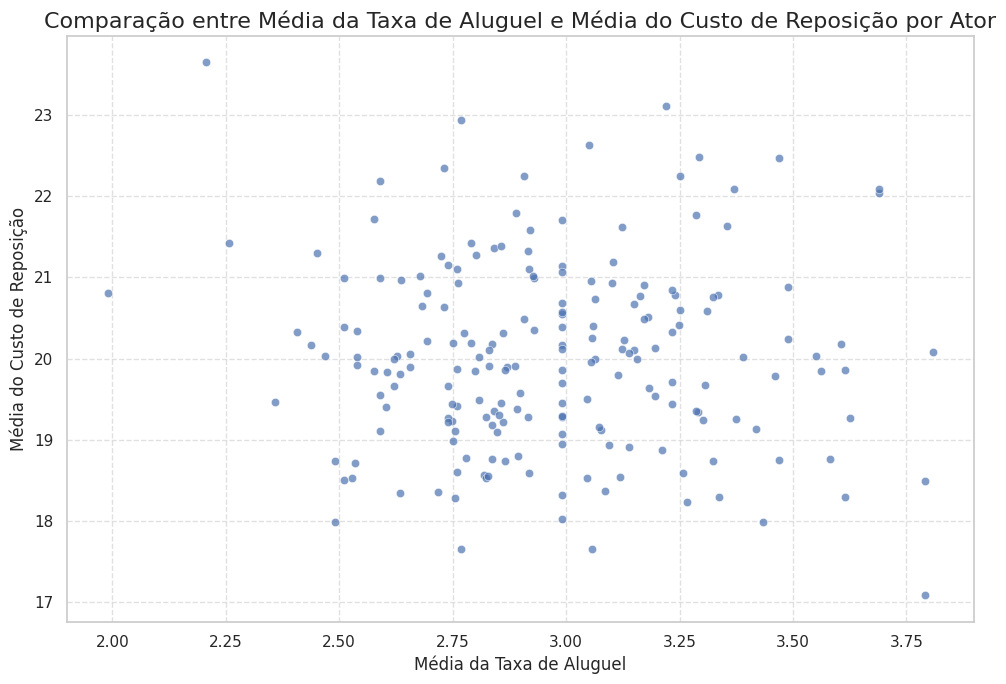

In [28]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_medias,
    x="avg_rental_rate",
    y="avg_replacement_cost",
    alpha=0.7
)

plt.title("Comparação entre Média da Taxa de Aluguel e Média do Custo de Reposição por Ator", fontsize=16)
plt.xlabel("Média da Taxa de Aluguel", fontsize=12)
plt.ylabel("Média do Custo de Reposição", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [34]:
display(df_medias.describe())

,avg_rental_duration,avg_rental_rate,avg_length,avg_replacement_cost
count,199.000000,199.000000,199.000000,199.000000
mean,4.990586,2.966517,115.416030,20.015595
std,0.268357,0.323116,7.496758,1.150796
min,4.346154,1.990000,96.640000,17.090000
25%,4.800000,2.752353,110.446558,19.236212
50%,5.000000,2.927500,115.480000,19.990000
75%,5.180195,3.176147,119.948276,20.777138
max,5.857143,3.808182,137.733333,23.642174


In [35]:
display(df_top10.describe())

,avg_rental_duration,avg_rental_rate,avg_length,avg_replacement_cost
count,10.000000,10.000000,10.000000,10.000000
mean,5.556037,3.153297,115.236513,19.870822
std,0.113622,0.348979,7.246836,0.769041
min,5.440000,2.731935,103.928571,18.490000
25%,5.500000,2.874375,110.355000,19.325417
50%,5.532258,3.093448,114.241935,20.076667
75%,5.559375,3.375945,121.596713,20.338999
max,5.857143,3.790000,125.541667,21.021250


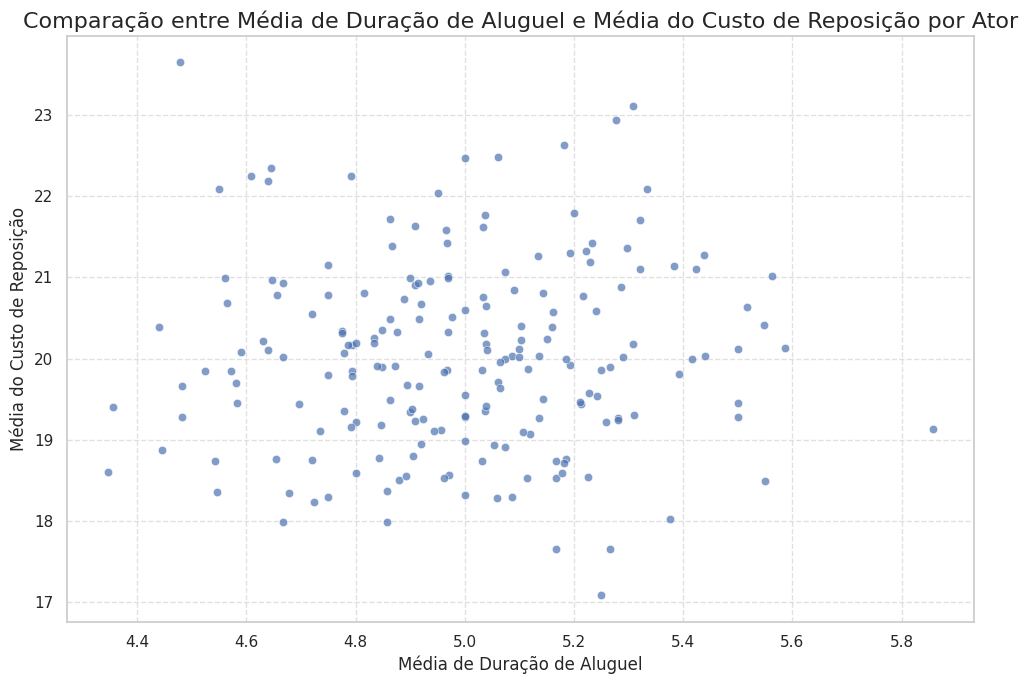

In [29]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_medias,
    x="avg_rental_duration",
    y="avg_replacement_cost",
    alpha=0.7
)

plt.title("Comparação entre Média de Duração de Aluguel e Média do Custo de Reposição por Ator", fontsize=16)
plt.xlabel("Média de Duração de Aluguel", fontsize=12)
plt.ylabel("Média do Custo de Reposição", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

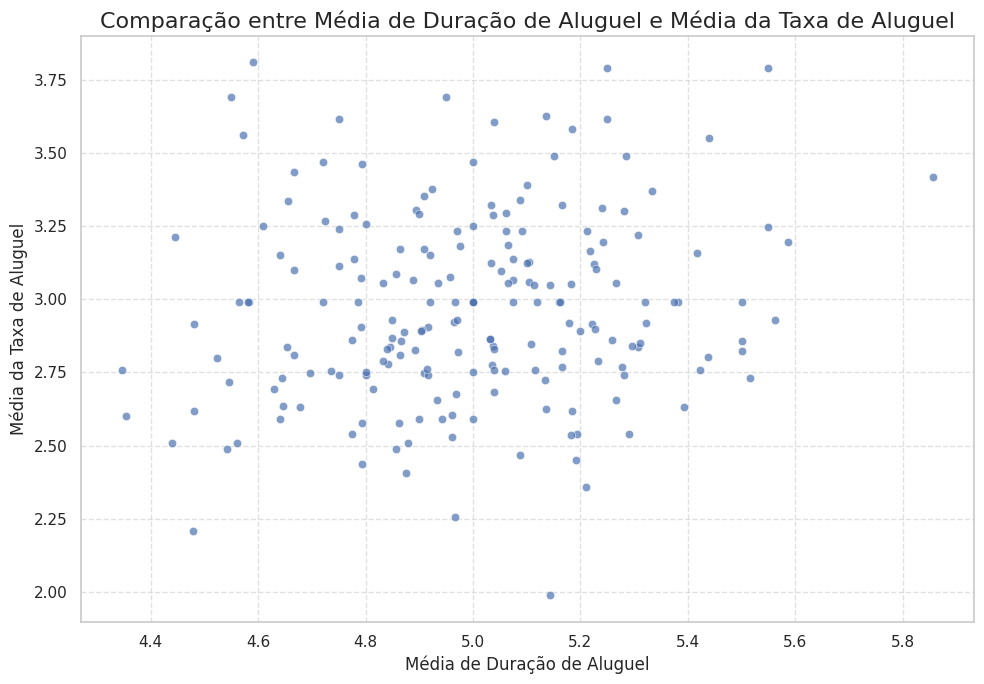

In [37]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_medias,
    x="avg_rental_duration",
    y="avg_rental_rate",
    alpha=0.7
)

plt.title("Comparação entre Média de Duração de Aluguel e Média da Taxa de Aluguel", fontsize=16)
plt.xlabel("Média de Duração de Aluguel", fontsize=12)
plt.ylabel("Média da Taxa de Aluguel", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [38]:
sql_bottom10 = '''
SELECT c.first_name, c.last_name, c.email,
SUM(p.amount) AS total_amount
FROM customer c
JOIN payment p ON p.customer_id=c.customer_id
GROUP BY c.first_name, c.last_name, c.email
ORDER BY total_amount ASC
LIMIT 10;
'''
bottom10 = execute_query("dvdrental", sql_bottom10)
bottom10

,first_name,last_name,email,total_amount
0,Brian,Wyman,brian.wyman@sakilacustomer.org,27.93
1,Leona,Obrien,leona.obrien@sakilacustomer.org,32.90
2,Caroline,Bowman,caroline.bowman@sakilacustomer.org,37.87
3,Anthony,Schwab,anthony.schwab@sakilacustomer.org,47.85
4,Tiffany,Jordan,tiffany.jordan@sakilacustomer.org,49.88
5,Kirk,Stclair,kirk.stclair@sakilacustomer.org,50.83
6,Bobbie,Craig,bobbie.craig@sakilacustomer.org,52.81
7,Jo,Fowler,jo.fowler@sakilacustomer.org,54.85
8,Penny,Neal,penny.neal@sakilacustomer.org,56.84
9,Johnny,Turpin,johnny.turpin@sakilacustomer.org,57.81


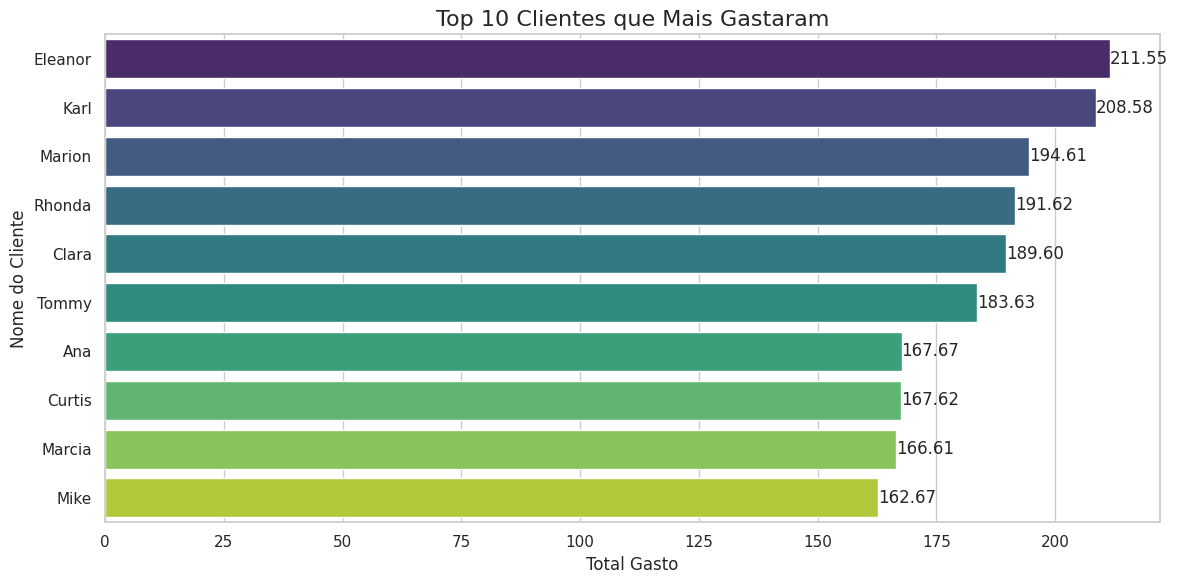

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x="total_amount",
    y="first_name",
    hue="first_name",
    palette='viridis',
    order=top10.sort_values('total_amount', ascending=False)['first_name'],
    legend=False
)

for index, value in enumerate(top10.sort_values('total_amount', ascending=False)['total_amount']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title("Top 10 Clientes que Mais Gastaram", fontsize=16)
plt.xlabel("Total Gasto", fontsize=12)
plt.ylabel("Nome do Cliente", fontsize=12)
plt.tight_layout()
plt.show()

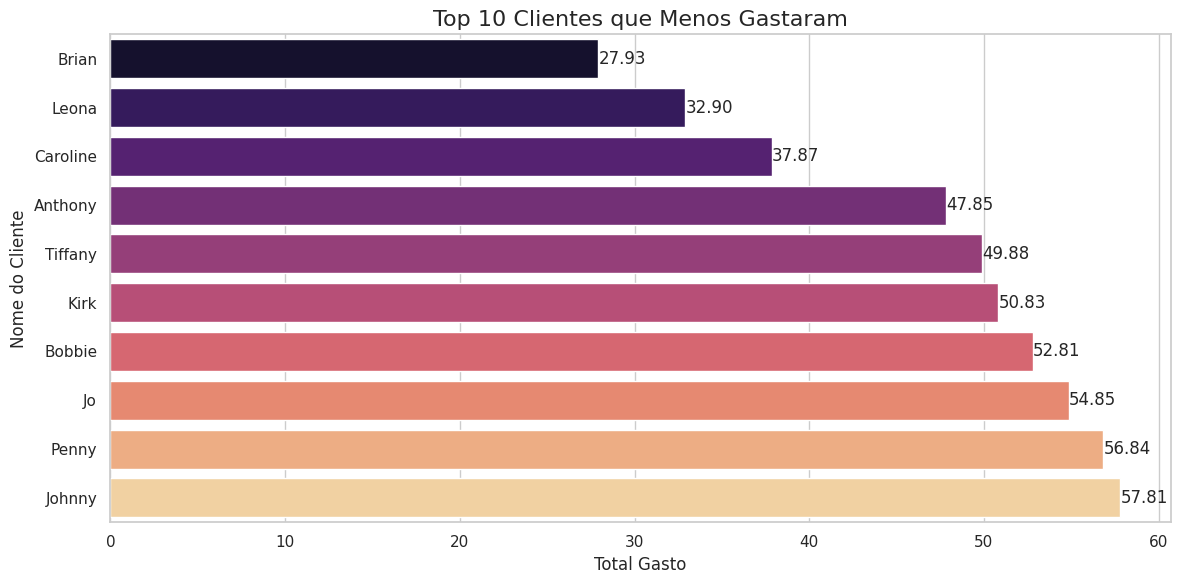

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bottom10,
    x="total_amount",
    y="first_name",
    hue="first_name",
    palette='magma',
    order=bottom10.sort_values('total_amount', ascending=True)['first_name'],
    legend=False
)

for index, value in enumerate(bottom10.sort_values('total_amount', ascending=True)['total_amount']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title("Top 10 Clientes que Menos Gastaram", fontsize=16)
plt.xlabel("Total Gasto", fontsize=12)
plt.ylabel("Nome do Cliente", fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
correlation_matrix = df_medias.corr(numeric_only=True)
display(correlation_matrix)

,avg_rental_duration,avg_rental_rate,avg_length,avg_replacement_cost
avg_rental_duration,1.000000,0.140523,-0.045263,0.024094
avg_rental_rate,0.140523,1.000000,0.052349,-0.047479
avg_length,-0.045263,0.052349,1.000000,-0.034347
avg_replacement_cost,0.024094,-0.047479,-0.034347,1.000000


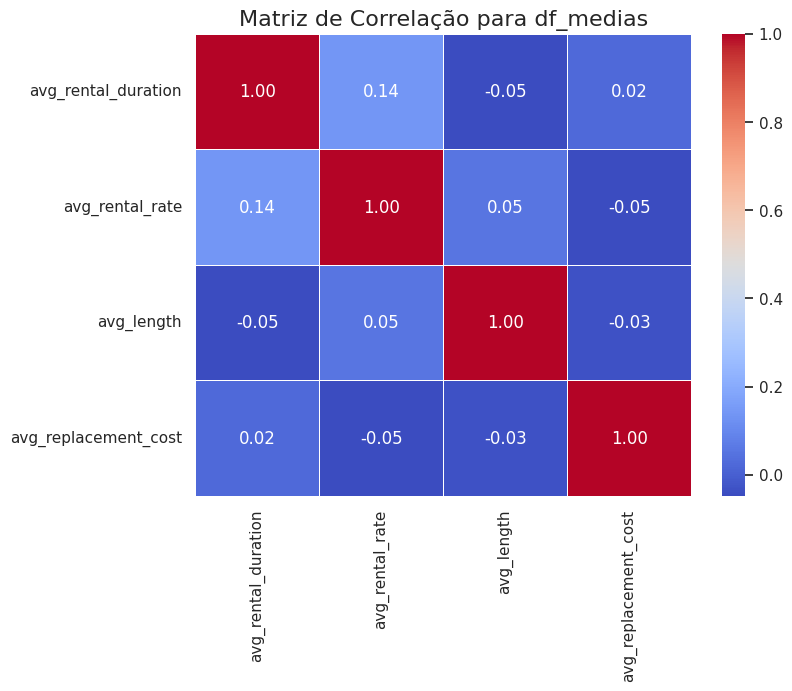

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação para df_medias', fontsize=16)
plt.show()

In [43]:
sql_bottom10 = '''
SELECT c.first_name, c.last_name, c.email,
SUM(p.amount) AS total_amount
FROM customer c
JOIN payment p ON p.customer_id=c.customer_id
GROUP BY c.first_name, c.last_name, c.email
ORDER BY total_amount ASC
LIMIT 10;
'''
bottom10 = execute_query("dvdrental", sql_bottom10)
bottom10

,first_name,last_name,email,total_amount
0,Brian,Wyman,brian.wyman@sakilacustomer.org,27.93
1,Leona,Obrien,leona.obrien@sakilacustomer.org,32.90
2,Caroline,Bowman,caroline.bowman@sakilacustomer.org,37.87
3,Anthony,Schwab,anthony.schwab@sakilacustomer.org,47.85
4,Tiffany,Jordan,tiffany.jordan@sakilacustomer.org,49.88
5,Kirk,Stclair,kirk.stclair@sakilacustomer.org,50.83
6,Bobbie,Craig,bobbie.craig@sakilacustomer.org,52.81
7,Jo,Fowler,jo.fowler@sakilacustomer.org,54.85
8,Penny,Neal,penny.neal@sakilacustomer.org,56.84
9,Johnny,Turpin,johnny.turpin@sakilacustomer.org,57.81


In [47]:
display(bottom10)

,first_name,last_name,email,total_amount
0,Brian,Wyman,brian.wyman@sakilacustomer.org,27.93
1,Leona,Obrien,leona.obrien@sakilacustomer.org,32.90
2,Caroline,Bowman,caroline.bowman@sakilacustomer.org,37.87
3,Anthony,Schwab,anthony.schwab@sakilacustomer.org,47.85
4,Tiffany,Jordan,tiffany.jordan@sakilacustomer.org,49.88
5,Kirk,Stclair,kirk.stclair@sakilacustomer.org,50.83
6,Bobbie,Craig,bobbie.craig@sakilacustomer.org,52.81
7,Jo,Fowler,jo.fowler@sakilacustomer.org,54.85
8,Penny,Neal,penny.neal@sakilacustomer.org,56.84
9,Johnny,Turpin,johnny.turpin@sakilacustomer.org,57.81


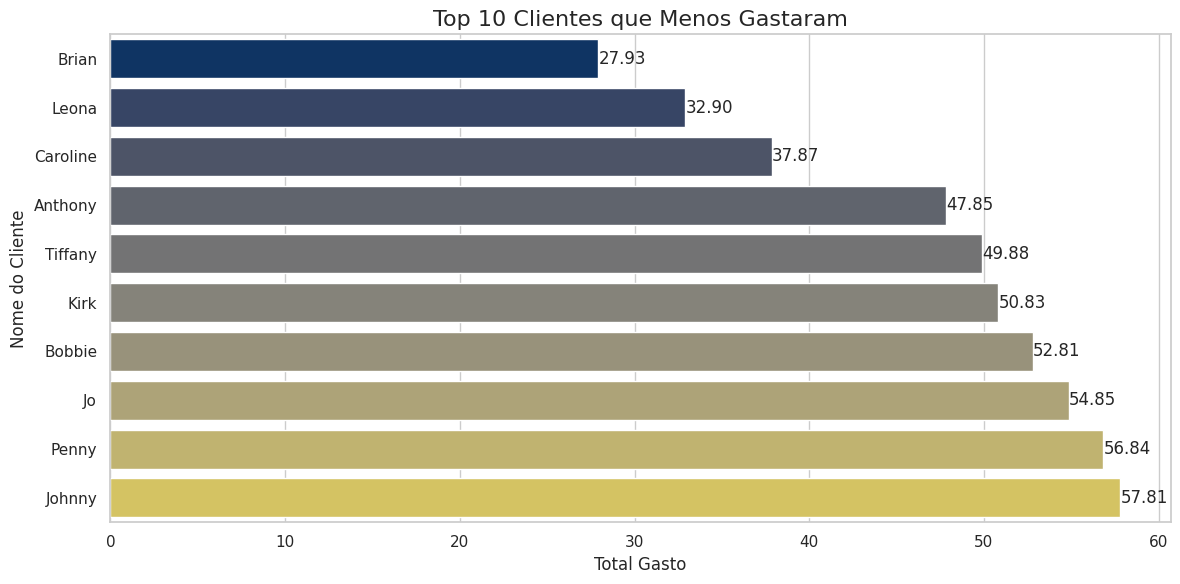

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bottom10,
    x="total_amount",
    y="first_name",
    hue="first_name",
    palette='cividis',
    order=bottom10.sort_values('total_amount', ascending=True)['first_name'],
    legend=False
)

for index, value in enumerate(bottom10.sort_values('total_amount', ascending=True)['total_amount']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title("Top 10 Clientes que Menos Gastaram", fontsize=16)
plt.xlabel("Total Gasto", fontsize=12)
plt.ylabel("Nome do Cliente", fontsize=12)
plt.tight_layout()
plt.show()

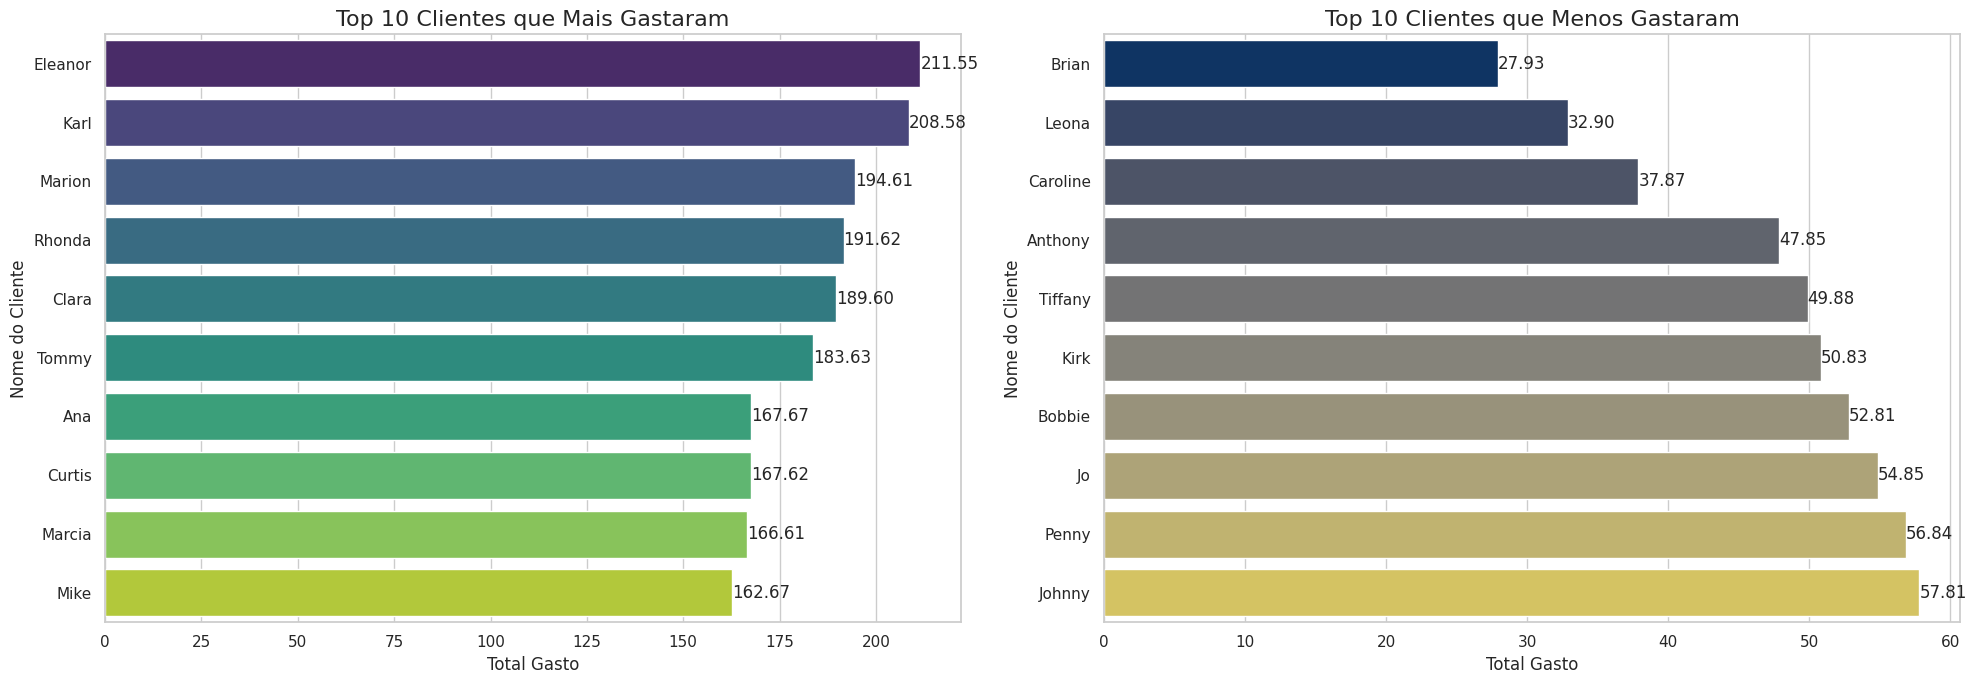

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plot for Top 10 Customers
sns.barplot(
    ax=axes[0],
    data=top10,
    x="total_amount",
    y="first_name",
    hue="first_name",
    palette='viridis',
    order=top10.sort_values('total_amount', ascending=False)['first_name'],
    legend=False
)
axes[0].set_title("Top 10 Clientes que Mais Gastaram", fontsize=16)
axes[0].set_xlabel("Total Gasto", fontsize=12)
axes[0].set_ylabel("Nome do Cliente", fontsize=12)
for index, value in enumerate(top10.sort_values('total_amount', ascending=False)['total_amount']):
    axes[0].text(value, index, f'{value:.2f}', va='center')

# Plot for Bottom 10 Customers
sns.barplot(
    ax=axes[1],
    data=bottom10,
    x="total_amount",
    y="first_name",
    hue="first_name",
    palette='cividis',
    order=bottom10.sort_values('total_amount', ascending=True)['first_name'],
    legend=False
)
axes[1].set_title("Top 10 Clientes que Menos Gastaram", fontsize=16)
axes[1].set_xlabel("Total Gasto", fontsize=12)
axes[1].set_ylabel("Nome do Cliente", fontsize=12)
for index, value in enumerate(bottom10.sort_values('total_amount', ascending=True)['total_amount']):
    axes[1].text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

In [52]:
print("Summary statistics for top10 customers:")
display(top10.describe())

Summary statistics for top10 customers:


,first_name,last_name,email,total_amount
count,10,10,10,10
unique,10,10,10,10
top,Eleanor,Hunt,eleanor.hunt@sakilacustomer.org,211.55
freq,1,1,1,1


In [53]:
print("Summary statistics for bottom10 customers:")
display(bottom10.describe())

Summary statistics for bottom10 customers:


,first_name,last_name,email,total_amount
count,10,10,10,10
unique,10,10,10,10
top,Brian,Wyman,brian.wyman@sakilacustomer.org,27.93
freq,1,1,1,1


In [57]:
actors_only_in_top10_duration = pd.merge(
    df_top10[['first_name', 'last_name']],
    df_top10_rate[['first_name', 'last_name']],
    on=['first_name', 'last_name'],
    how='left',
    indicator=True
).query('_merge == "left_only"').drop(columns=['_merge'])

if not actors_only_in_top10_duration.empty:
    print("Actors in df_top10 (avg_rental_duration) but NOT in df_top10_rate (avg_rental_rate):")
    display(actors_only_in_top10_duration)
else:
    print("There are no actors in df_top10 who are not in df_top10_rate.")

Actors in df_top10 (avg_rental_duration) but NOT in df_top10_rate (avg_rental_rate):


,first_name,last_name
0,Emily,Dee
1,Burt,Dukakis
2,Warren,Jackman
4,Mary,Tandy
5,Russell,Temple
6,Cary,Mcconaughey
7,Nick,Stallone
8,Richard,Penn
9,Liza,Bergman


In [58]:
display(df_top10_rate.describe())

,avg_rental_duration,avg_rental_rate,avg_length,avg_replacement_cost
count,10.000000,10.000000,10.000000,10.000000
mean,5.025092,3.681252,117.751965,19.617122
std,0.318054,0.086408,8.123367,1.592113
min,4.550000,3.582593,106.050000,17.090000
25%,4.800000,3.615000,112.031250,18.559444
50%,5.087413,3.658182,117.707933,19.563864
75%,5.233796,3.765000,118.977273,20.156958
max,5.550000,3.808182,130.850000,22.090000


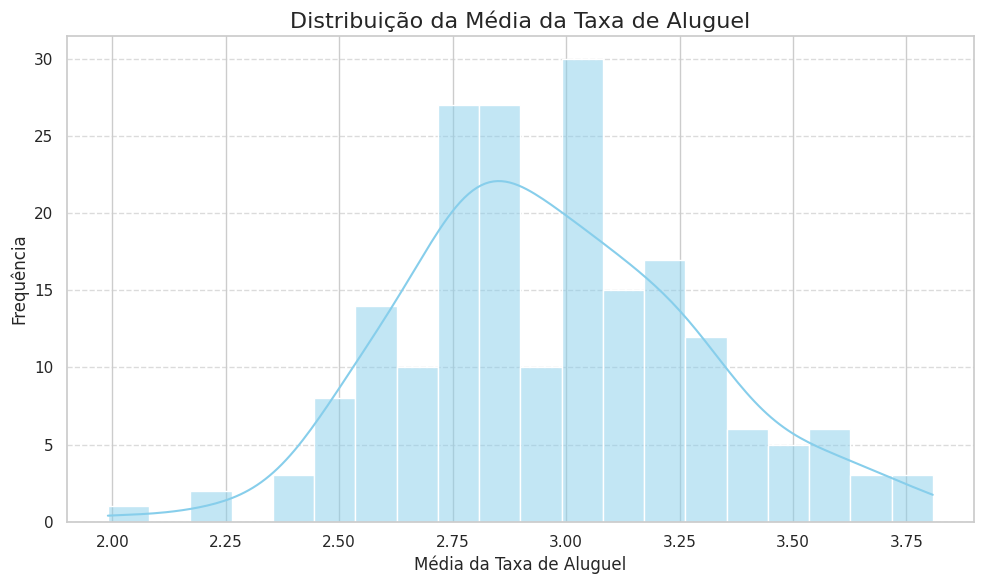

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df_medias['avg_rental_rate'], kde=True, bins=20, color='skyblue')
plt.title('Distribuição da Média da Taxa de Aluguel', fontsize=16)
plt.xlabel('Média da Taxa de Aluguel', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

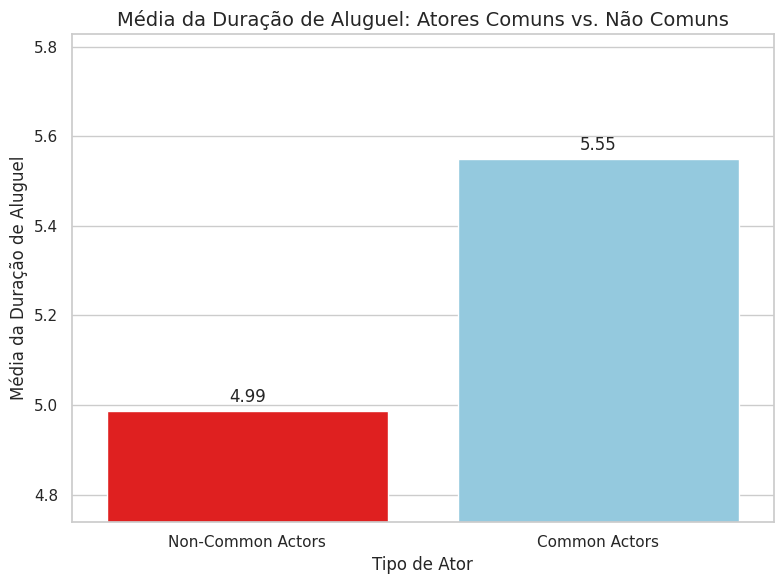

In [61]:
# Calculate average rental duration for common vs non-common actors
comparison_data_duration = df_medias.groupby('is_common')['avg_rental_duration'].mean().reset_index()
comparison_data_duration['is_common_label'] = comparison_data_duration['is_common'].map({True: 'Common Actors', False: 'Non-Common Actors'})

plt.figure(figsize=(8, 6))
sns.barplot(
    data=comparison_data_duration,
    x='is_common_label',
    y='avg_rental_duration',
    hue='is_common_label',
    palette=['red', 'skyblue'], # Red for common, skyblue for non-common
    legend=False
)

# Add values on bars
for index, value in enumerate(comparison_data_duration['avg_rental_duration']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.title('Média da Duração de Aluguel: Atores Comuns vs. Não Comuns', fontsize=14)
plt.xlabel('Tipo de Ator', fontsize=12)
plt.ylabel('Média da Duração de Aluguel', fontsize=12)
plt.ylim(bottom=comparison_data_duration['avg_rental_duration'].min() * 0.95) # Adjust y-axis limit for better visualization
plt.tight_layout()
plt.show()

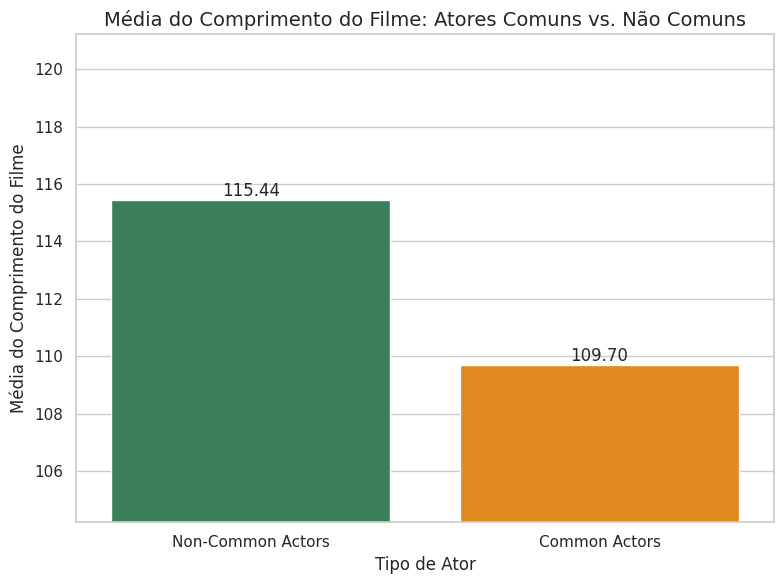

In [63]:
# Calculate average length for common vs non-common actors
comparison_data_length = df_medias.groupby('is_common')['avg_length'].mean().reset_index()
comparison_data_length['is_common_label'] = comparison_data_length['is_common'].map({True: 'Common Actors', False: 'Non-Common Actors'})

plt.figure(figsize=(8, 6))
sns.barplot(
    data=comparison_data_length,
    x='is_common_label',
    y='avg_length',
    hue='is_common_label',
    palette=['seagreen', 'darkorange'], # Changed palette colors
    legend=False
)

# Add values on bars
for index, value in enumerate(comparison_data_length['avg_length']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.title('Média do Comprimento do Filme: Atores Comuns vs. Não Comuns', fontsize=14)
plt.xlabel('Tipo de Ator', fontsize=12)
plt.ylabel('Média do Comprimento do Filme', fontsize=12)
plt.ylim(bottom=comparison_data_length['avg_length'].min() * 0.95) # Adjust y-axis limit for better visualization
plt.tight_layout()
plt.show()

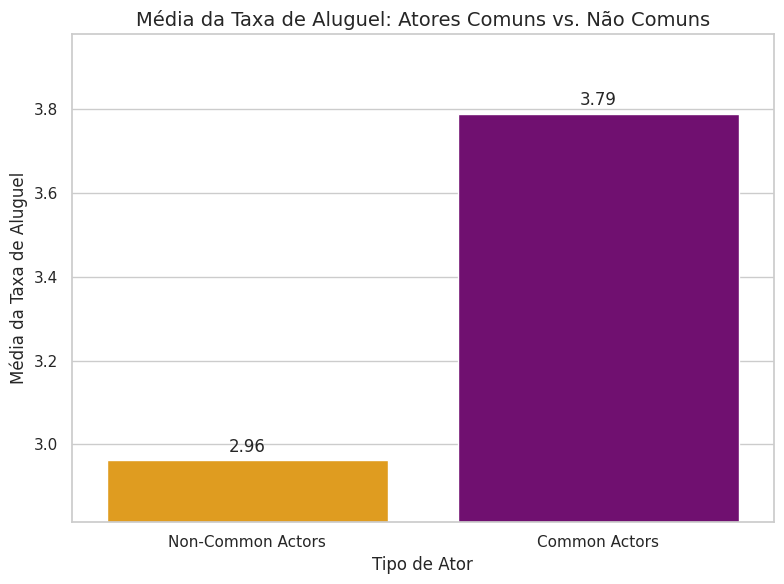

In [64]:
# Add 'is_common' column to df_medias
df_medias['is_common'] = df_medias.apply(
    lambda row: (common_actors['first_name'] == row['first_name']).any() and
                (common_actors['last_name'] == row['last_name']).any(),
    axis=1
)

# Calculate average rental rate for common vs non-common actors
comparison_data = df_medias.groupby('is_common')['avg_rental_rate'].mean().reset_index()
comparison_data['is_common_label'] = comparison_data['is_common'].map({True: 'Common Actors', False: 'Non-Common Actors'})

plt.figure(figsize=(8, 6))
sns.barplot(
    data=comparison_data,
    x='is_common_label',
    y='avg_rental_rate',
    hue='is_common_label',
    palette=['orange', 'purple'], # Updated palette colors
    legend=False
)

# Add values on bars
for index, value in enumerate(comparison_data['avg_rental_rate']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.title('Média da Taxa de Aluguel: Atores Comuns vs. Não Comuns', fontsize=14)
plt.xlabel('Tipo de Ator', fontsize=12)
plt.ylabel('Média da Taxa de Aluguel', fontsize=12)
plt.ylim(bottom=comparison_data['avg_rental_rate'].min() * 0.95) # Adjust y-axis limit for better visualization
plt.tight_layout()
plt.show()

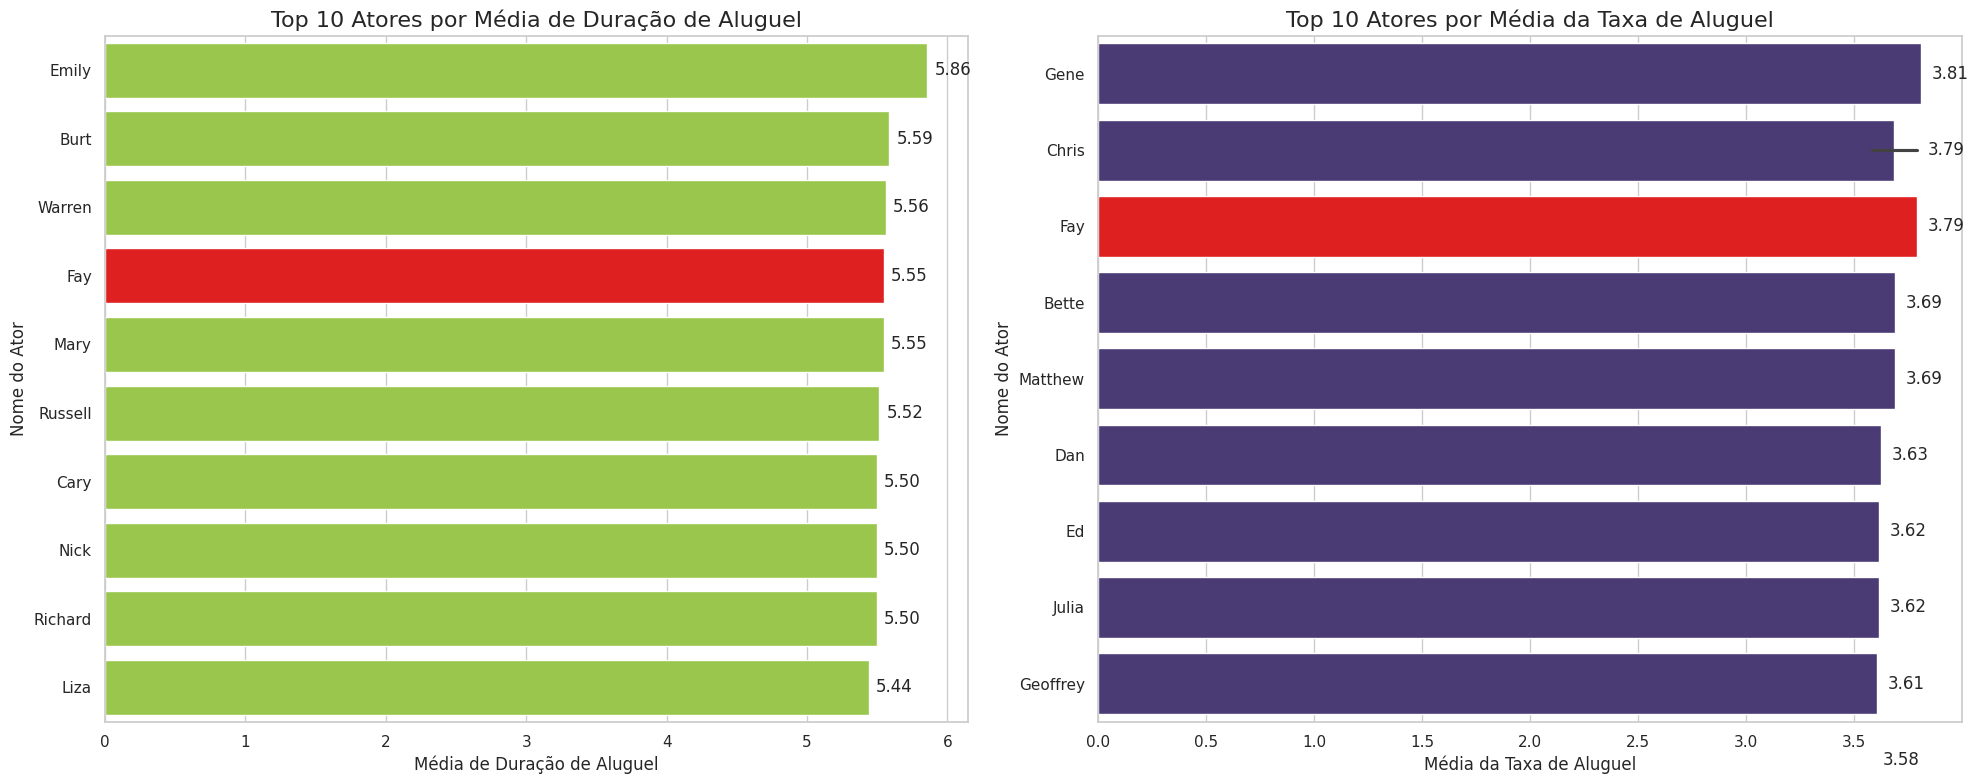

In [56]:
# Add 'is_common' column to df_top10
df_top10['is_common'] = df_top10.apply(
    lambda row: (common_actors['first_name'] == row['first_name']).any() and
                (common_actors['last_name'] == row['last_name']).any(),
    axis=1
)

# Add 'is_common' column to df_top10_rate
df_top10_rate['is_common'] = df_top10_rate.apply(
    lambda row: (common_actors['first_name'] == row['first_name']).any() and
                (common_actors['last_name'] == row['last_name']).any(),
    axis=1
)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Define custom palette
non_common_color_duration = sns.color_palette('viridis')[5] # A mid-range viridis color
non_common_color_rate = sns.color_palette('viridis')[0]    # Another viridis color

palette_duration = {True: 'red', False: non_common_color_duration}
palette_rate = {True: 'red', False: non_common_color_rate}

# Plot for df_top10 (Avg Rental Duration)
sns.barplot(
    ax=axes[0],
    data=df_top10,
    x="avg_rental_duration",
    y="first_name",
    hue="is_common", # Use the new column for hue
    palette=palette_duration,
    order=df_top10.sort_values('avg_rental_duration', ascending=False)['first_name'],
    legend=False
)
axes[0].set_title("Top 10 Atores por Média de Duração de Aluguel", fontsize=16)
axes[0].set_xlabel("Média de Duração de Aluguel", fontsize=12)
axes[0].set_ylabel("Nome do Ator", fontsize=12)
for index, value in enumerate(df_top10.sort_values('avg_rental_duration', ascending=False)['avg_rental_duration']):
    axes[0].text(value + 0.05, index, f'{value:.2f}', va='center')


# Plot for df_top10_rate (Avg Rental Rate)
sns.barplot(
    ax=axes[1],
    data=df_top10_rate,
    x="avg_rental_rate",
    y="first_name",
    hue="is_common", # Use the new column for hue
    palette=palette_rate,
    order=df_top10_rate.sort_values('avg_rental_rate', ascending=False)['first_name'],
    legend=False
)
axes[1].set_title("Top 10 Atores por Média da Taxa de Aluguel", fontsize=16)
axes[1].set_xlabel("Média da Taxa de Aluguel", fontsize=12)
axes[1].set_ylabel("Nome do Ator", fontsize=12)
for index, value in enumerate(df_top10_rate.sort_values('avg_rental_rate', ascending=False)['avg_rental_rate']):
    axes[1].text(value + 0.05, index, f'{value:.2f}', va='center')


plt.tight_layout()
plt.show()

**Conclusão:**
A prática calculou médias por ator e identificou top/bottom clientes.
Foram aplicados SUM, AVG, GROUP BY, ORDER BY e LIMIT.
Visualizações com Seaborn facilitaram interpretação.
Tudo validado.
